<a href="https://colab.research.google.com/github/WisudantyoWahyu/SISTEM-CERDAS/blob/main/Classification_Class_Revenue_Site_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [4]:
# from sklearn.datasets import load_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('dataset2.csv')
# df = pd.read_excel("xxx.xls", sheet_name="sheet 1")
df.head()

,Site,Class Rev,Payload Total (GB),Traffic,Subs,Revenue
0,Site 1,Gold,30419,1765,1414,134017424
1,Site 2,Silver,13872,1685,731,62952270
2,Site 3,Gold,28531,1070,1206,120884649
3,Site 4,Bronze,10777,911,761,54450496
4,Site 5,Bronze,10990,1418,934,53238883


In [6]:
test_X = df.iloc[:,2:5].values
print(test_X.shape)

(593, 3)


In [7]:
X = df.iloc[:,2:5].values
Y = df.iloc[:,[1]].values

In [8]:
print(Y)

[['Gold']
 ['Silver']
 ['Gold']
 ['Bronze']
 ['Bronze']
 ['Gold']
 ['Silver']
 ['Gold']
 ['Gold']
 ['Silver']
 ['Silver']
 ['Bronze']
 ['Gold']
 ['Silver']
 ['Gold']
 ['Silver']
 ['Bronze']
 ['Silver']
 ['Gold']
 ['Silver']
 ['Gold']
 ['Silver']
 ['Silver']
 ['Bronze']
 ['Gold']
 ['Bronze']
 ['Bronze']
 ['Bronze']
 ['Bronze']
 ['Bronze']
 ['Gold']
 ['Gold']
 ['Silver']
 ['Silver']
 ['Gold']
 ['Diamond']
 ['Silver']
 ['Gold']
 ['Gold']
 ['Gold']
 ['Silver']
 ['Gold']
 ['Bronze']
 ['Silver']
 ['Bronze']
 ['Gold']
 ['Silver']
 ['Gold']
 ['Silver']
 ['Bronze']
 ['Gold']
 ['Gold']
 ['Gold']
 ['Silver']
 ['Silver']
 ['Gold']
 ['Silver']
 ['Gold']
 ['Gold']
 ['Silver']
 ['Silver']
 ['Platinum']
 ['Bronze']
 ['Bronze']
 ['Silver']
 ['Silver']
 ['Bronze']
 ['Silver']
 ['Silver']
 ['Gold']
 ['Silver']
 ['Silver']
 ['Silver']
 ['Gold']
 ['Gold']
 ['Gold']
 ['Gold']
 ['Silver']
 ['Silver']
 ['Gold']
 ['Silver']
 ['Silver']
 ['Gold']
 ['Silver']
 ['Gold']
 ['Silver']
 ['Bronze']
 ['Bronze']
 ['Gold

In [9]:
target_names = df['Class Rev'].unique()
print(target_names)

['Gold' 'Silver' 'Bronze' 'Diamond' 'Platinum']


In [10]:
print(X.shape)
print(Y.shape)

(593, 3)
(593, 1)


In [11]:
(trainX, testX, trainY, testY) = train_test_split(X, Y, random_state=3, test_size=0.3)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(415, 3)
(178, 3)
(415, 1)
(178, 1)


In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 154 kB 11.0 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31646 sha256=cd011d5d55b2625721d102d93844b24e03d399fbb5347ff1b951b33eff342697
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [12]:
# import the necessary packages
from keras.models import Sequential
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
# from keras.layers.core import Flatten
from keras.layers.core import Dense
#from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from PIL import Image
# from imutils import paths
# import numpy as np
# import os
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
Y

array([['Gold'],
       ['Silver'],
       ['Gold'],
       ['Bronze'],
       ['Bronze'],
       ['Gold'],
       ['Silver'],
       ['Gold'],
       ['Gold'],
       ['Silver'],
       ['Silver'],
       ['Bronze'],
       ['Gold'],
       ['Silver'],
       ['Gold'],
       ['Silver'],
       ['Bronze'],
       ['Silver'],
       ['Gold'],
       ['Silver'],
       ['Gold'],
       ['Silver'],
       ['Silver'],
       ['Bronze'],
       ['Gold'],
       ['Bronze'],
       ['Bronze'],
       ['Bronze'],
       ['Bronze'],
       ['Bronze'],
       ['Gold'],
       ['Gold'],
       ['Silver'],
       ['Silver'],
       ['Gold'],
       ['Diamond'],
       ['Silver'],
       ['Gold'],
       ['Gold'],
       ['Gold'],
       ['Silver'],
       ['Gold'],
       ['Bronze'],
       ['Silver'],
       ['Bronze'],
       ['Gold'],
       ['Silver'],
       ['Gold'],
       ['Silver'],
       ['Bronze'],
       ['Gold'],
       ['Gold'],
       ['Gold'],
       ['Silver'],
       ['Silver']

In [14]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(Y)
print(labels)

[[0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 ...
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]]


In [15]:
(trainX, testX, trainY, testY) = train_test_split(X, np.array(labels), test_size=0.4)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(355, 3)
(238, 3)
(355, 5)
(238, 5)


In [ ]:
model = keras.Sequential()
model.add(layers.Dense(5, kernel_initializer='uniform', input_shape=(3,)))
model.add(layers.Activation('softmax'))

In [16]:
#model ANN
#Skenario 1

model = keras.Sequential(
    [
        Dense(64, activation="relu", input_shape=(3,)), #hidden layer 1
        Dense(32, activation="relu"),
        Dense(16, activation="relu"),
        Dense(5, activation = "softmax"),
    ]
)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 5)                 85        
                                                                 
Total params: 2,949
Trainable params: 2,949
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=100)

[INFO] training network...
Epoch 1/100
4/4 [==============================] - 1s 75ms/step - loss: 78.6909 - accuracy: 0.2930 - val_loss: 28.5980 - val_accuracy: 0.4370
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 30.4878 - accuracy: 0.4197 - val_loss: 27.5768 - val_accuracy: 0.0966
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 22.0673 - accuracy: 0.3070 - val_loss: 44.4010 - val_accuracy: 0.3950
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 43.4226 - accuracy: 0.3549 - val_loss: 38.1617 - val_accuracy: 0.3950
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 33.1535 - accuracy: 0.4254 - val_loss: 29.7942 - val_accuracy: 0.3697
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 26.4423 - accuracy: 0.3634 - val_loss: 18.4456 - val_accuracy: 0.3992
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 13.8751 - accuracy: 0.4282 - val_loss: 7.2890 - v

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


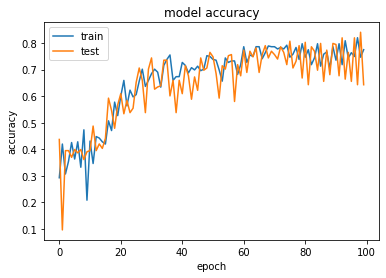

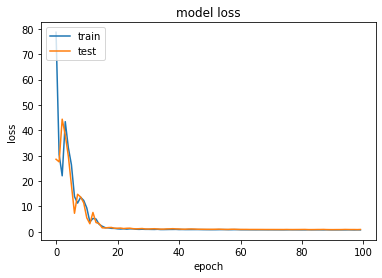

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
#TES IMPLEMENTASI
df2 = pd.read_csv('tes implementasi.csv')
# df = pd.read_excel("xxx.xls", sheet_name="sheet 1")
df2.head()

,Site,Class Rev,Payload Total (GB),Traffic,Subs,Revenue,Prediksi ANN
0,Site 601,Silver,12236,1892,1173,72323800,?
1,Site 602,Bronze,6548,1129,280,38331569,?
2,Site 603,Gold,29338,3391,2423,159013510,?
3,Site 604,Gold,21707,1702,1353,109470028,?
4,Site 605,Silver,16365,1126,967,88936249,?


In [19]:
test_Z = df2.iloc[:,2:5].values.astype(float)
print(test_Z.shape)

(100, 3)


In [20]:
predict = model.predict(test_Z)
print(predict)

[[0.00000000e+00 1.00000000e+00 3.07059595e-23 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 4.40747539e-17 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 7.75657147e-33 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 3.83760268e-09 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 9.99970317e-01 2.96932667e-05 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 9.99999046e-01 9.14928535e-07 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 2.48622206e-27 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 5.03797226e-09 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.18318486e-36 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 2.98576878e-14 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 1.89900387e-10 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 2.94338753e-19 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 2.676933

In [ ]:
print(lb.classes_[predict.argmax(axis=1)])

['Silver' 'Bronze' 'Gold' 'Gold' 'Gold' 'Silver' 'Gold' 'Bronze' 'Gold'
 'Silver' 'Gold' 'Silver' 'Silver' 'Silver' 'Silver' 'Gold' 'Silver'
 'Bronze' 'Gold' 'Gold' 'Bronze' 'Gold' 'Silver' 'Gold' 'Silver' 'Gold'
 'Bronze' 'Bronze' 'Bronze' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold'
 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Silver' 'Gold' 'Silver' 'Silver'
 'Gold' 'Gold' 'Silver' 'Silver' 'Gold' 'Silver' 'Gold' 'Gold' 'Silver'
 'Silver' 'Gold' 'Gold' 'Gold' 'Silver' 'Gold' 'Gold' 'Silver' 'Gold'
 'Gold' 'Gold' 'Gold' 'Silver' 'Silver' 'Silver' 'Bronze' 'Silver'
 'Silver' 'Silver' 'Gold' 'Silver' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold'
 'Gold' 'Gold' 'Silver' 'Gold' 'Silver' 'Gold' 'Silver' 'Silver' 'Silver'
 'Silver' 'Silver' 'Silver' 'Gold' 'Silver' 'Silver' 'Silver' 'Gold'
 'Gold' 'Gold' 'Silver' 'Bronze']


In [21]:
#model ANN
#Skenario 2

model = keras.Sequential(
    [
        Dense(64, activation="relu", input_shape=(3,)), #hidden layer 1
        #Dense(32, activation="relu"),
        Dense(16, activation="relu"),
        Dense(5, activation = "softmax"),
    ]
)

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 16)                1040      
                                                                 
 dense_6 (Dense)             (None, 5)                 85        
                                                                 
Total params: 1,381
Trainable params: 1,381
Non-trainable params: 0
_________________________________________________________________


In [23]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=100)

[INFO] training network...
Epoch 1/100
4/4 [==============================] - 1s 74ms/step - loss: 688.2858 - accuracy: 0.2761 - val_loss: 803.1394 - val_accuracy: 0.4244
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 756.6946 - accuracy: 0.3268 - val_loss: 487.9234 - val_accuracy: 0.4412
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 344.5150 - accuracy: 0.4197 - val_loss: 438.2369 - val_accuracy: 0.1807
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 258.0381 - accuracy: 0.1352 - val_loss: 164.6708 - val_accuracy: 0.0588
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 102.4408 - accuracy: 0.1718 - val_loss: 99.5296 - val_accuracy: 0.3235
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 89.3719 - accuracy: 0.3915 - val_loss: 94.1330 - val_accuracy: 0.4286
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 91.5703 - accuracy: 0.3634 - val_loss: 95.322

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


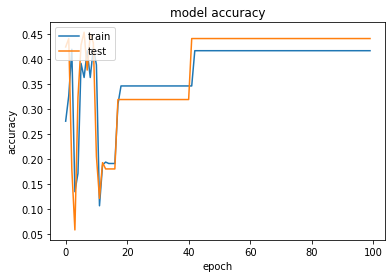

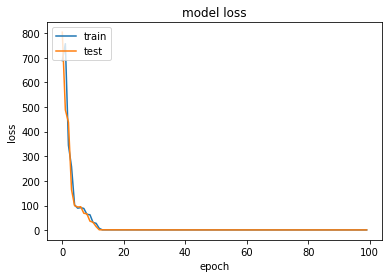

In [24]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
predict = model.predict(test_Z)
print(predict)


[[0.18381254 0.02366341 0.40503827 0.05324582 0.33424002]
 [0.18381254 0.02366341 0.40503827 0.05324582 0.33424002]
 [0.18381254 0.02366341 0.40503827 0.05324582 0.33424002]
 [0.18381254 0.02366341 0.40503827 0.05324582 0.33424002]
 [0.18381254 0.02366341 0.40503827 0.05324582 0.33424002]
 [0.18381254 0.02366341 0.40503827 0.05324582 0.33424002]
 [0.18381254 0.02366341 0.40503827 0.05324582 0.33424002]
 [0.18381254 0.02366341 0.40503827 0.05324582 0.33424002]
 [0.18381254 0.02366341 0.40503827 0.05324582 0.33424002]
 [0.18381254 0.02366341 0.40503827 0.05324582 0.33424002]
 [0.18381254 0.02366341 0.40503827 0.05324582 0.33424002]
 [0.18381254 0.02366341 0.40503827 0.05324582 0.33424002]
 [0.18381254 0.02366341 0.40503827 0.05324582 0.33424002]
 [0.18381254 0.02366341 0.40503827 0.05324582 0.33424002]
 [0.18381254 0.02366341 0.40503827 0.05324582 0.33424002]
 [0.18381254 0.02366341 0.40503827 0.05324582 0.33424002]
 [0.18381254 0.02366341 0.40503827 0.05324582 0.33424002]
 [0.18381254 0

In [26]:
print(lb.classes_[predict.argmax(axis=1)])

['Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold'
 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold'
 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold'
 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold'
 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold'
 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold'
 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold'
 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold'
 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold'
 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold']


In [42]:
#model ANN
#Skenario 3

model = keras.Sequential(
    [
        Dense(64, activation="relu", input_shape=(3,)), #hidden layer 1
        #Dense(32, activation="relu"),
        #Dense(16, activation="relu"),
        Dense(5, activation = "softmax"),
    ]
)


In [43]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                256       
                                                                 
 dense_15 (Dense)            (None, 5)                 325       
                                                                 
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


In [44]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt,
  metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=100)


[INFO] training network...
Epoch 1/100
4/4 [==============================] - 1s 57ms/step - loss: 5968.7134 - accuracy: 0.2225 - val_loss: 3725.7368 - val_accuracy: 0.3193
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 1671.6903 - accuracy: 0.3662 - val_loss: 1574.6218 - val_accuracy: 0.4412
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 1876.0278 - accuracy: 0.4169 - val_loss: 1686.8195 - val_accuracy: 0.4412
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 1415.5104 - accuracy: 0.2648 - val_loss: 816.1577 - val_accuracy: 0.1387
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 726.8044 - accuracy: 0.2845 - val_loss: 362.8271 - val_accuracy: 0.4454
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 421.7187 - accuracy: 0.4141 - val_loss: 939.0457 - val_accuracy: 0.3235
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 529.4619 - accuracy: 0.3690 - val

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


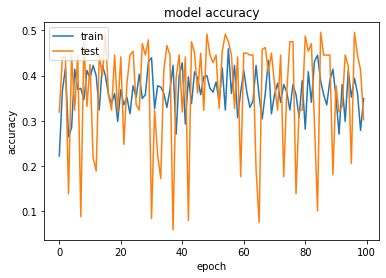

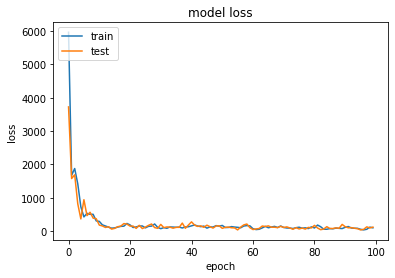

In [45]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [46]:
predict = model.predict(test_Z)
print(predict)


[[0.00000000e+00 0.00000000e+00 9.28226072e-12 0.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.19611780e-15 0.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.51264551e-36 0.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.58338019e-27 0.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.64507583e-22 0.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.40198806e-23 0.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.92029577e-03 1.24187529e-17
  9.93079722e-01]
 [0.00000000e+00 0.00000000e+00 7.76407285e-30 0.00000000e+00
  1.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.29249282e-33]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.98955965e-01 0.00000000e+00
  1.04406767e-03]
 [0.00000000e+00 0.00000000e+00 2.968962

In [47]:
print(lb.classes_[predict.argmax(axis=1)])

['Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver'
 'Silver' 'Bronze' 'Silver' 'Gold' 'Silver' 'Silver' 'Silver' 'Silver'
 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver'
 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Gold'
 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver'
 'Silver' 'Silver' 'Bronze' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver'
 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver'
 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver'
 'Silver' 'Silver' 'Gold' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver'
 'Silver' 'Gold' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver'
 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver'
 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver' 'Silver'
 'Silver' 'Silver' 'Silver' 'Silver']


In [48]:
#model ANN
#Skenario 4

model = keras.Sequential(
    [
        Dense(5, activation="relu", input_shape=(3,)), #hidden layer 1
        #Dense(32, activation="relu"),
        #Dense(16, activation="relu"),
        #Dense(5, activation = "softmax"),
    ]
)


In [49]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 5)                 20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [50]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt,
  metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=100)


[INFO] training network...
Epoch 1/100
4/4 [==============================] - 0s 46ms/step - loss: 4.3445 - accuracy: 0.4169 - val_loss: 4.3775 - val_accuracy: 0.4412
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 4.3411 - accuracy: 0.4169 - val_loss: 4.3778 - val_accuracy: 0.4412
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 4.3404 - accuracy: 0.4169 - val_loss: 4.3791 - val_accuracy: 0.4412
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 4.3396 - accuracy: 0.4169 - val_loss: 4.3803 - val_accuracy: 0.4412
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 4.3412 - accuracy: 0.4169 - val_loss: 4.3818 - val_accuracy: 0.4412
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 4.3403 - accuracy: 0.4169 - val_loss: 4.3814 - val_accuracy: 0.4412
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 4.3401 - accuracy: 0.4169 - val_loss: 4.3808 - val_accuracy: 0.4412

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


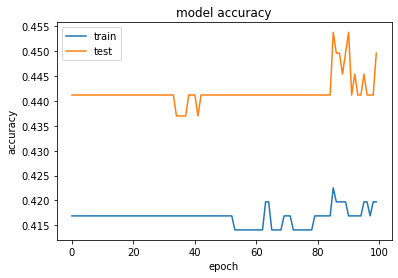

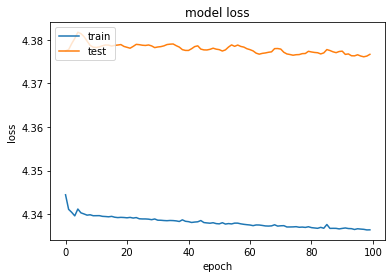

In [51]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [52]:
predict = model.predict(test_Z)
print(predict)


[[    0.         0.      8695.147      0.      7722.6914]
 [    0.         0.      4573.6577     0.      4644.5767]
 [    0.         0.     21335.5        0.     17629.25  ]
 [    0.         0.     16112.784      0.     12602.35  ]
 [    0.         0.     12212.888      0.      9380.269 ]
 [    0.         0.      9235.629      0.      7372.9785]
 [    0.         0.     12707.622      0.     11177.515 ]
 [    0.         0.      3454.0251     0.      3120.0935]
 [    0.         0.     22702.297      0.     18126.596 ]
 [    0.         0.      3211.6863     0.      5487.7856]
 [    0.         0.     21376.885      0.     16989.654 ]
 [    0.         0.      6279.02       0.      6445.6587]
 [    0.         0.      5201.3633     0.      5115.9834]
 [    0.         0.      8943.151      0.      7590.085 ]
 [    0.         0.      5438.974      0.      4150.9536]
 [    0.         0.     28257.734      0.     21944.668 ]
 [    0.         0.      6653.0474     0.      6401.0454]
 [    0.      

In [53]:
print(lb.classes_[predict.argmax(axis=1)])

['Gold' 'Silver' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Silver'
 'Gold' 'Silver' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold'
 'Silver' 'Silver' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold'
 'Gold' 'Silver' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold'
 'Gold' 'Gold' 'Silver' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold'
 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold'
 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Silver' 'Silver' 'Gold' 'Gold' 'Gold'
 'Gold' 'Gold' 'Gold' 'Silver' 'Silver' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold'
 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Silver' 'Gold' 'Gold' 'Gold' 'Gold'
 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold' 'Gold']
